In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [44]:
data = pd.read_csv('train.csv')
# The cleaned data was provided by REDX lab. Thanks to Aditya, he was really good help.

In [45]:
data

,Unnamed: 0,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,areacode
0,0,35,107,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,415
1,1,31,137,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,415
2,2,35,84,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,408
3,3,36,75,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,415
4,4,19,121,0,1,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,0,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,26,83,0,0,0,188.3,70,32.01,243.8,...,20.72,213.7,79,9.62,10.3,6,2.78,0,0,415
4246,4246,49,73,0,0,0,177.9,89,30.24,131.2,...,11.15,186.2,89,8.38,11.5,6,3.11,3,0,408
4247,4247,27,75,0,0,0,170.7,101,29.02,193.1,...,16.41,129.1,104,5.81,6.9,7,1.86,1,0,408
4248,4248,11,50,0,1,40,235.7,127,40.07,223.0,...,18.96,297.5,116,13.39,9.9,5,2.67,2,0,408


In [46]:
data['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


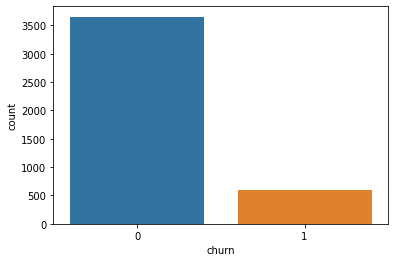

In [47]:
sns.countplot(data['churn'])

In [48]:
x = data.drop(['churn'],axis=1)
y = data['churn']

In [49]:
sc = StandardScaler ()

In [50]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
x_train

array([[ 1.46495026, -0.55834273, -0.51694862, ..., -1.22033116,
         0.1238885 , -0.51760209],
       [-1.27848703, -0.8322015 ,  1.28191145, ...,  0.46322792,
        -1.15658322, -0.68336628],
       [-1.18723095, -0.21601928, -0.13147861, ...,  0.27763873,
        -0.51634736, -0.51760209],
       ...,
       [ 0.55238946, -1.65377779, -0.64543863, ..., -0.18633425,
         1.40436023, -0.68336628],
       [ 0.85493214, -0.69527212, -0.23427061, ..., -0.43820529,
        -0.51634736,  1.73205486],
       [-0.26727101, -1.10606026,  0.69085742, ...,  1.09953371,
        -1.15658322, -0.68336628]])

In [52]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
5137    1
5138    1
5139    1
5140    1
5141    1
Name: churn, Length: 5142, dtype: int64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=250)

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_train,y_train = ros.fit_resample(x_train,y_train)

In [55]:
y_train.value_counts()

0    2571
1    2571
Name: churn, dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4250 non-null   int64  
 1   state                          4250 non-null   int64  
 2   account_length                 4250 non-null   int64  
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [57]:
data

,Unnamed: 0,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,areacode
0,0,35,107,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,415
1,1,31,137,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,415
2,2,35,84,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,408
3,3,36,75,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,415
4,4,19,121,0,1,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,0,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,26,83,0,0,0,188.3,70,32.01,243.8,...,20.72,213.7,79,9.62,10.3,6,2.78,0,0,415
4246,4246,49,73,0,0,0,177.9,89,30.24,131.2,...,11.15,186.2,89,8.38,11.5,6,3.11,3,0,408
4247,4247,27,75,0,0,0,170.7,101,29.02,193.1,...,16.41,129.1,104,5.81,6.9,7,1.86,1,0,408
4248,4248,11,50,0,1,40,235.7,127,40.07,223.0,...,18.96,297.5,116,13.39,9.9,5,2.67,2,0,408


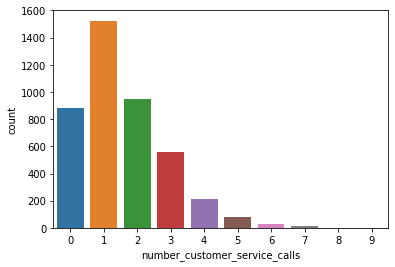

In [58]:
sns.countplot(data=data,x="number_customer_service_calls")

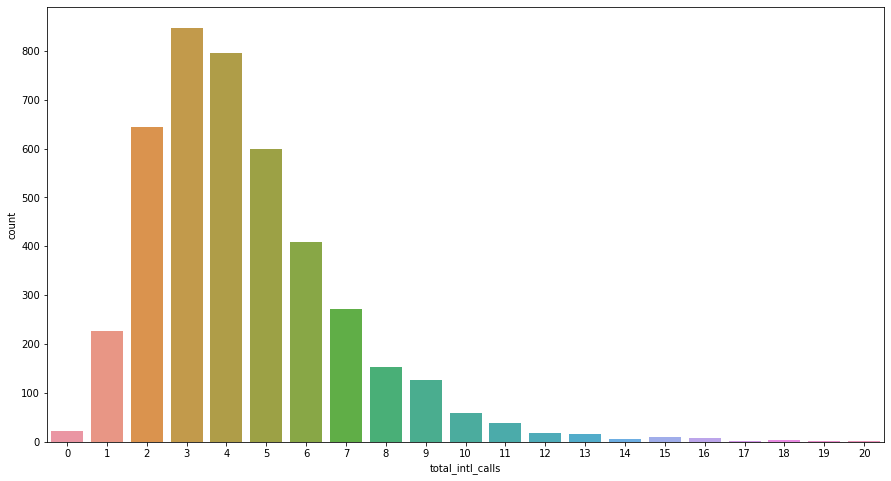

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='total_intl_calls')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


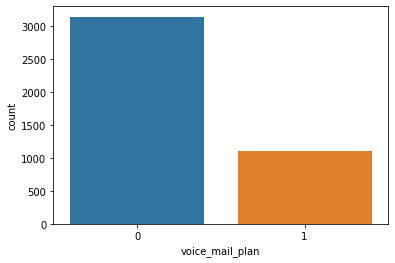

In [60]:
sns.countplot(data['voice_mail_plan'])


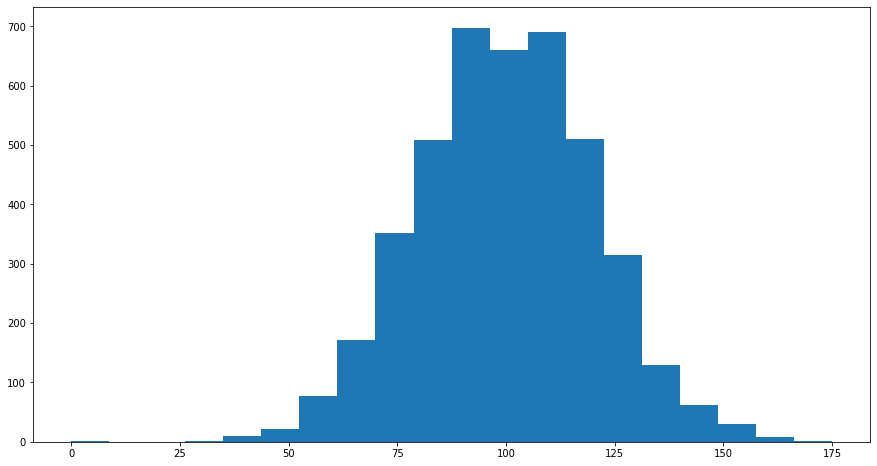

In [61]:
a = data['total_night_calls']
# fig, ax = plt.subplots(figsize =(10, 7))
plt.figure(figsize=(15,8))
plt.hist(a, bins = 20)

plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [63]:
print(classification_report(y_test,y_predl))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1081
           1       0.37      0.77      0.50       194

    accuracy                           0.76      1275
   macro avg       0.66      0.77      0.67      1275
weighted avg       0.86      0.76      0.79      1275



In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred4 = dt.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1081
           1       0.72      0.74      0.73       194

    accuracy                           0.92      1275
   macro avg       0.84      0.85      0.84      1275
weighted avg       0.92      0.92      0.92      1275



In [66]:
rf = RandomForestClassifier ()
rf.fit(x_train,y_train)
y_pred5 = rf.predict(x_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1081
           1       0.92      0.77      0.84       194

    accuracy                           0.95      1275
   macro avg       0.94      0.88      0.91      1275
weighted avg       0.95      0.95      0.95      1275



In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred6=gbc.predict(x_test)


In [68]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1081
           1       0.70      0.85      0.77       194

    accuracy                           0.92      1275
   macro avg       0.84      0.89      0.86      1275
weighted avg       0.93      0.92      0.92      1275



In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(y_test,y_predl))

[[824 257]
 [ 44 150]]


In [71]:
print(confusion_matrix(y_test,y_pred6))

[[1011   70]
 [  30  164]]
